In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Generiamo un dataset sintetico
np.random.seed(42)
n_samples = 10000
X = np.random.rand(n_samples, 3)  # 3 caratteristiche casuali (es. età, parametri genetici, ecc.)
y = np.random.binomial(1, 0.005, size=n_samples)  # Prevalenza della malattia 0.5%

# Aggiungiamo un "test positivo" con precisione e recall similari a quanto descritto
# Il test identifica 90% dei malati (recall), ma ha 5% di falsi positivi
y_pred = np.random.binomial(1, 0.9, size=n_samples) * y  # Recall del 90%
falsi_positivi = np.random.binomial(1, 0.05, size=n_samples) * (1 - y)  # 5% di falsi positivi
y_pred += falsi_positivi

# Split dei dati in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creazione del modello di regressione logistica
model = LogisticRegression()
model.fit(X_train, y_train)

# Predizioni
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calcolo delle metriche
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{cm}")


Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[2986    0]
 [  14    0]]


C:\Users\franc\PycharmProjects\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


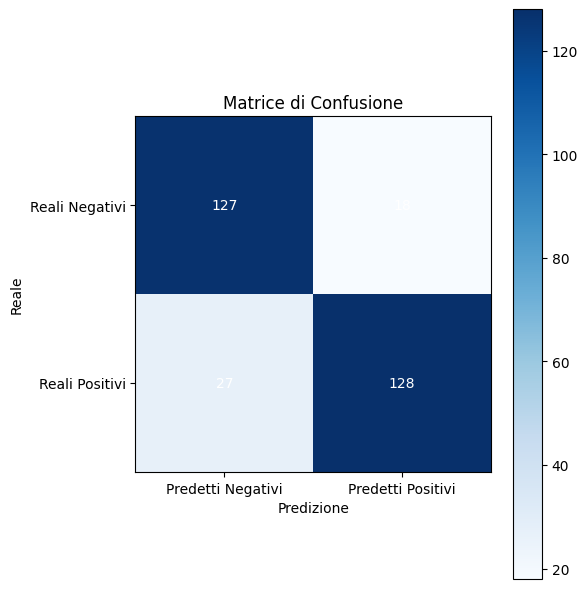

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Creazione di un dataset sintetico di classificazione binaria
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Divisione del dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creazione di un modello di regressione logistica
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predizione sul test set
y_pred = model.predict(X_test)

# Calcolo della matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizzare la Matrice di Confusione
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Matrice di Confusione')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predetti Negativi', 'Predetti Positivi'])
ax.set_yticklabels(['Reali Negativi', 'Reali Positivi'])
plt.xlabel('Predizione')
plt.ylabel('Reale')

# Aggiungi la colorbar associata all'oggetto mappabile
plt.colorbar(cax)

# Annotazioni con i valori della matrice di confusione
for i in range(2):
    for j in range(2):
        ax.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()
